In [2]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  0


AssertionError: Torch not compiled with CUDA enabled

In [4]:
# !pip install ipykernel
# python -m ipykernel install --user --name deepgpu --display-name "Python (GPU)"


SyntaxError: invalid syntax (2930202454.py, line 2)

In [4]:
# !pip install ipykernel
# !python -m ipykernel install --user --name deepgpu --display-name "Python (GPU)"



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Installed kernelspec deepgpu in C:\Users\moham\AppData\Roaming\jupyter\kernels\deepgpu


In [2]:
!pip install ipykernel
!python - m ipykernel install - -user - -name deepgpu - -display-name "Python (GPU)"



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Installed kernelspec deepgpu in C:\Users\moham\AppData\Roaming\jupyter\kernels\deepgpu


In [2]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


2.6.0+cpu
CUDA available: False
CPU only


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno
import os
import sys
import warnings
# from ydata_profiling import ProfileReport


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/StudentPerformanceFactors.csv')
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,NaN,NaN,NaN,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,NaN,NaN,NaN,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Parental_Involvement,6607,3,Medium,3362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Access_to_Resources,6607,3,Medium,3319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extracurricular_Activities,6607,2,Yes,3938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep_Hours,6607.0,NaN,NaN,NaN,7.02906,1.46812,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,NaN,NaN,NaN,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Motivation_Level,6607,3,Medium,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internet_Access,6607,2,Yes,6108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tutoring_Sessions,6607.0,NaN,NaN,NaN,1.493719,1.23057,0.0,1.0,1.0,2.0,8.0


In [5]:
df.describe(include='O').T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


In [6]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

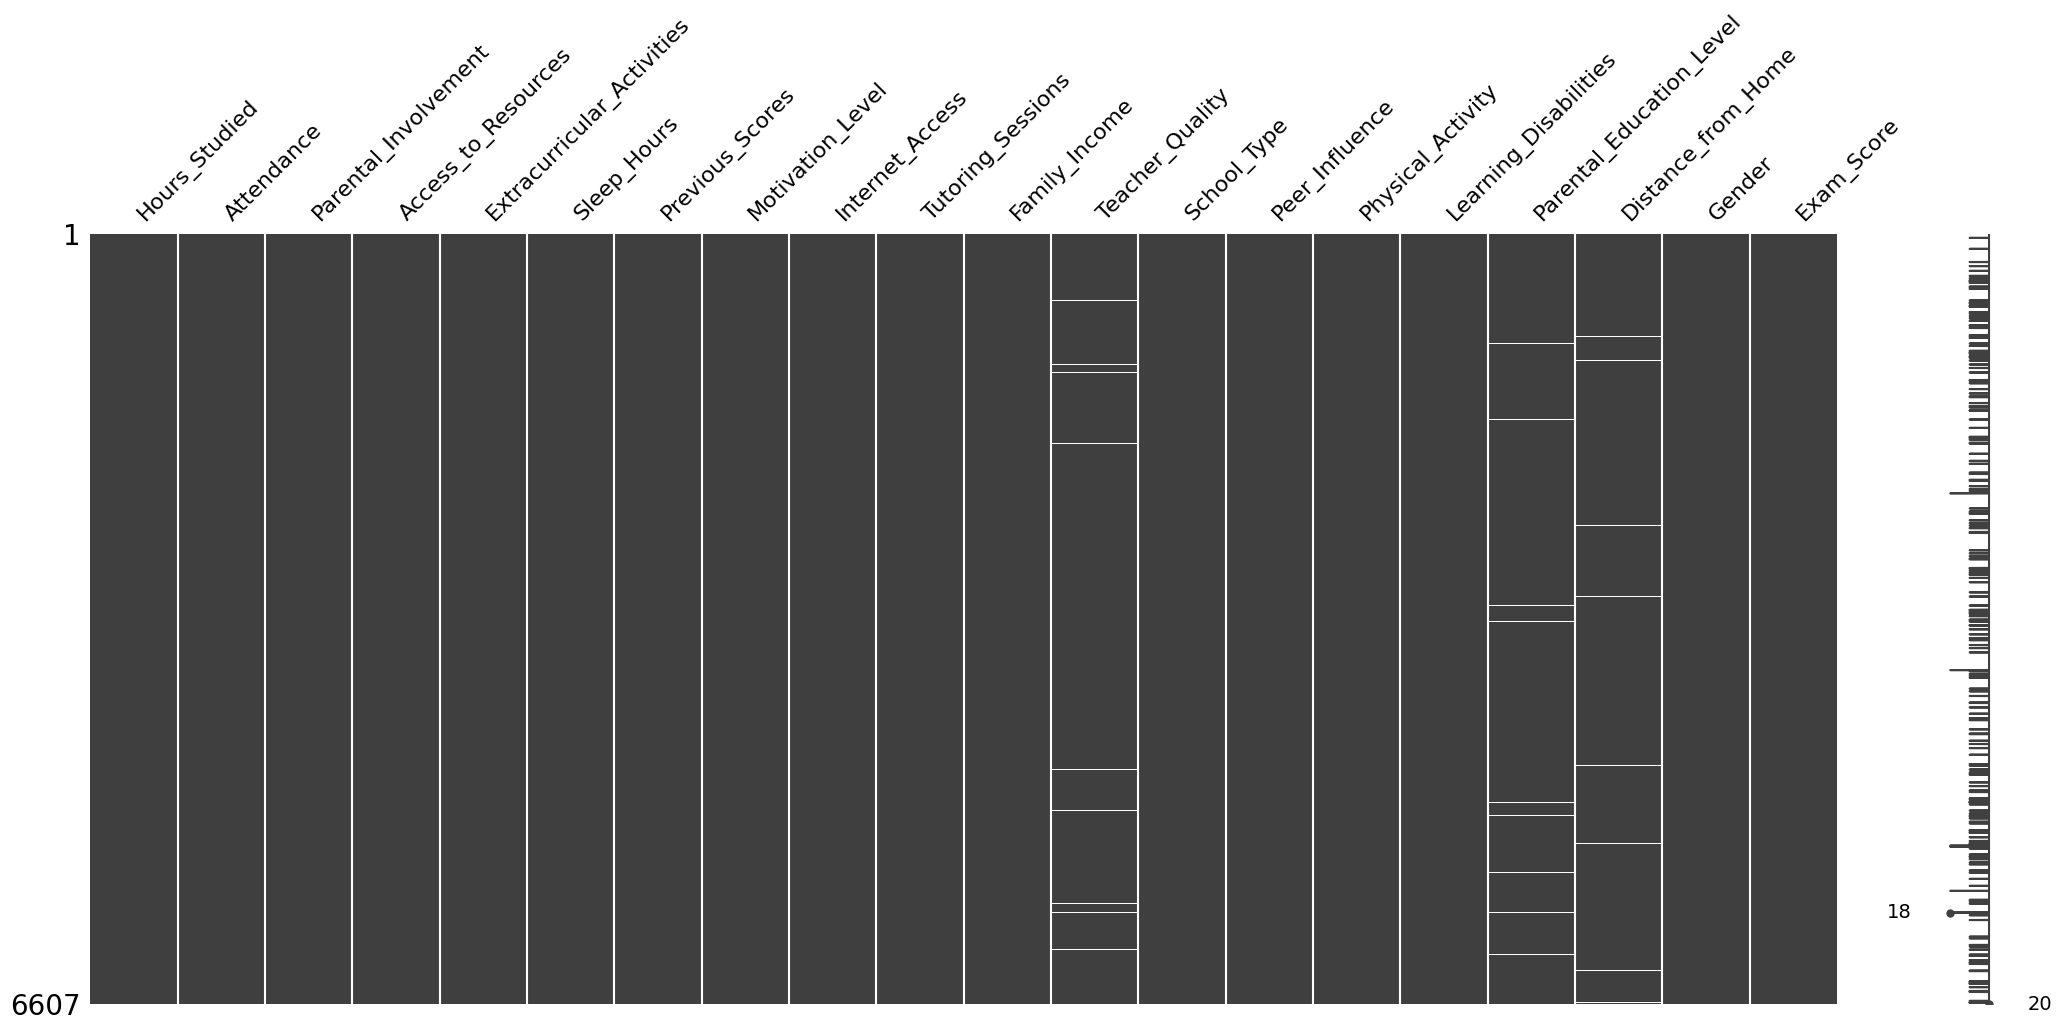

In [7]:
msno.matrix(df)
plt.show()

In [8]:
df['Tutoring_Sessions'].unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [9]:
df['Sleep_Hours'].unique()

array([ 7,  8,  6, 10,  9,  5,  4], dtype=int64)

In [10]:
df['Physical_Activity'].unique()

array([3, 4, 2, 1, 5, 0, 6], dtype=int64)

In [11]:
# df['Previous_Scores'].unique()

In [12]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

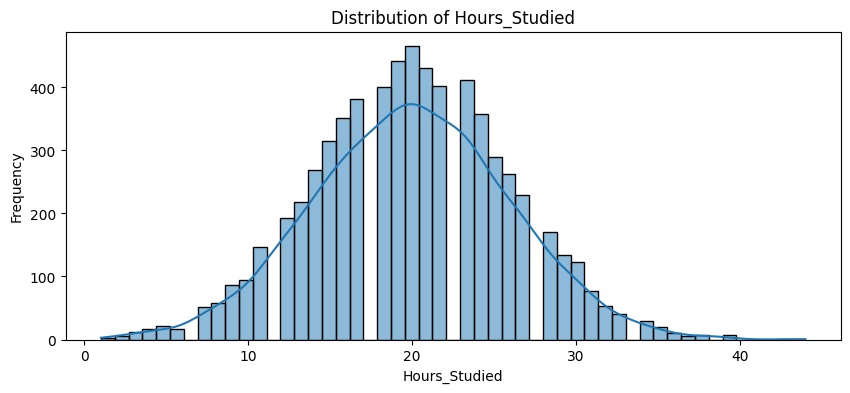

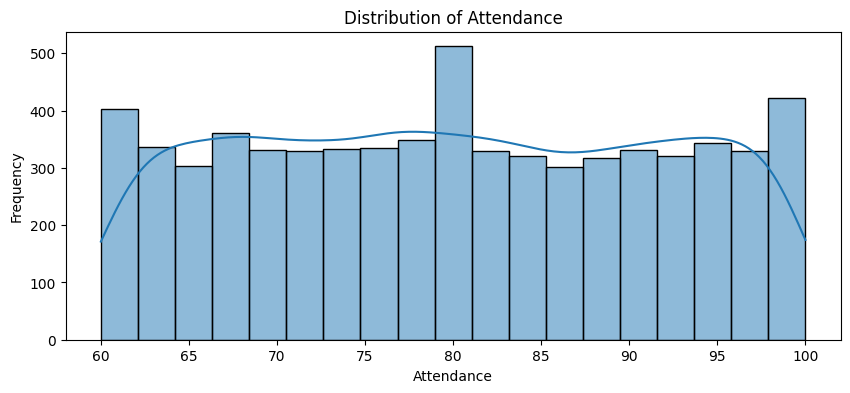

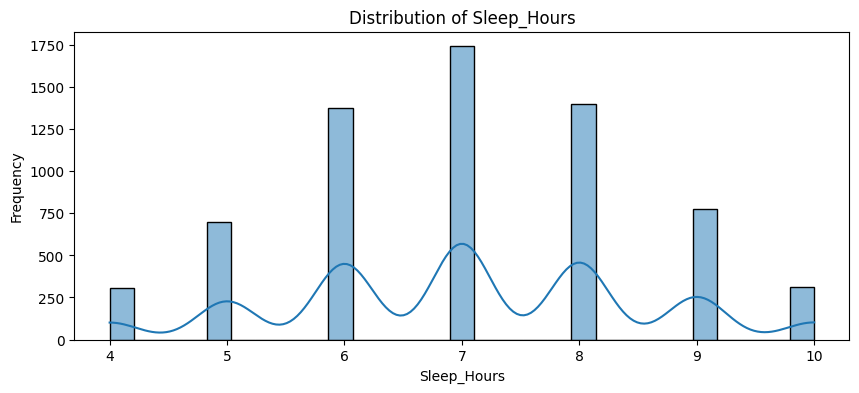

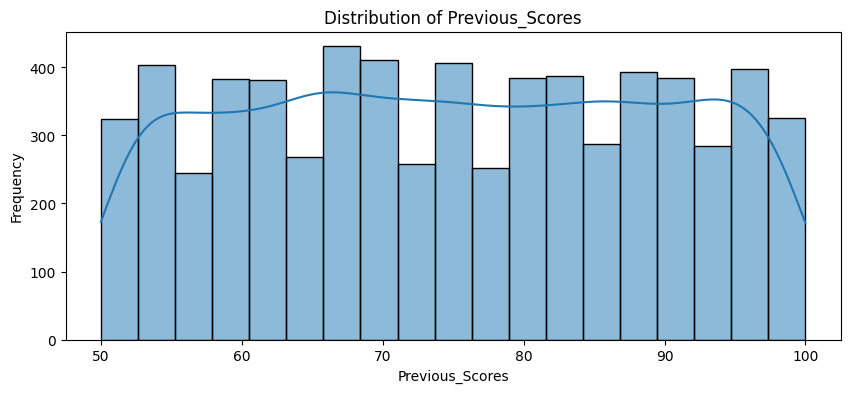

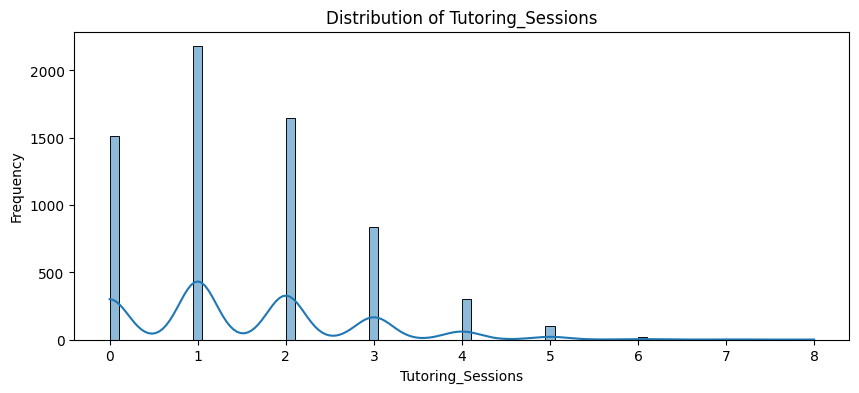

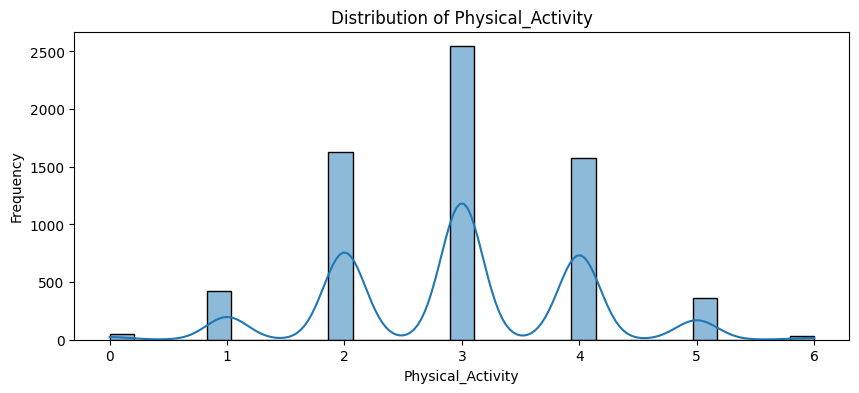

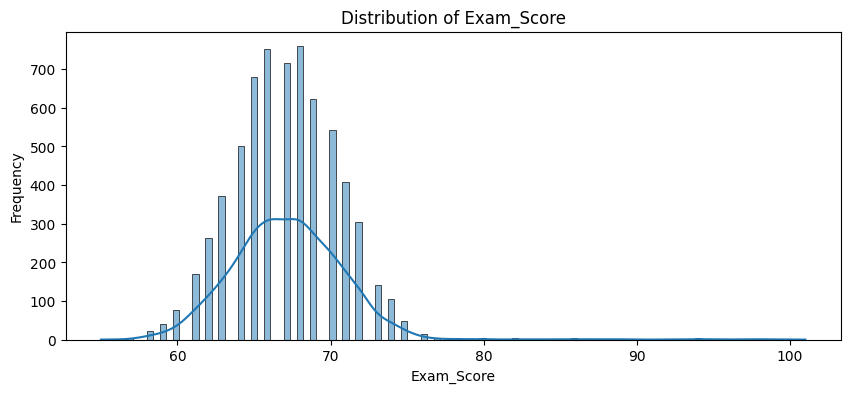

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    # fig=px.histogram(df, x=col, title=f'Distribution of {col}')
    # fig.show()